In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
data=pd.read_excel('gulf.xlsx', index_col=0)

In [18]:
data['pct_change'] = data['Close'].pct_change()

In [19]:
data.head()

,Prior,Open,High,Low,Close,P/E,PEG,P/BV,pct_change
Date,,,,,,,,,
2019-01-01,16.12,16.02,17.25,15.77,17.20,53.69,1.57,5.13,NaN
2019-02-01,17.20,17.15,18.59,16.96,17.90,63.76,-5.20,5.28,0.040698
2019-03-01,17.90,17.90,19.28,17.30,18.88,67.28,-5.49,5.58,0.054749
2019-04-01,18.88,18.93,20.96,18.93,20.66,73.62,-6.00,6.10,0.094280
2019-05-01,20.66,20.56,21.36,18.88,20.37,84.09,-2.37,5.83,-0.014037


In [20]:
data['pct_change'] = data['pct_change'].shift(-1)

In [21]:
data.head()

,Prior,Open,High,Low,Close,P/E,PEG,P/BV,pct_change
Date,,,,,,,,,
2019-01-01,16.12,16.02,17.25,15.77,17.20,53.69,1.57,5.13,0.040698
2019-02-01,17.20,17.15,18.59,16.96,17.90,63.76,-5.20,5.28,0.054749
2019-03-01,17.90,17.90,19.28,17.30,18.88,67.28,-5.49,5.58,0.094280
2019-04-01,18.88,18.93,20.96,18.93,20.66,73.62,-6.00,6.10,-0.014037
2019-05-01,20.66,20.56,21.36,18.88,20.37,84.09,-2.37,5.83,0.193913


In [23]:
data.describe()

,Prior,Open,High,Low,Close,P/E,PEG,P/BV,pct_change
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,33.000000
mean,30.725294,30.752353,33.520294,28.922647,31.508529,87.705882,-0.991765,8.640294,0.032537
std,6.852079,6.855749,7.293969,6.383602,6.651051,20.650736,3.865228,3.317137,0.101010
min,16.120000,16.020000,17.250000,15.770000,17.200000,53.690000,-7.640000,5.130000,-0.140042
25%,28.542500,28.540000,32.082500,24.447500,28.917500,72.520000,-4.392500,6.110000,-0.021898
50%,32.920000,33.170000,35.000000,30.875000,33.135000,84.335000,0.635000,7.120000,0.007519
75%,34.250000,34.000000,38.607500,32.802500,34.437500,102.557500,1.255000,9.422500,0.054749
max,41.750000,42.000000,45.250000,41.000000,42.750000,126.600000,5.830000,16.000000,0.291639


<AxesSubplot:xlabel='Date'>

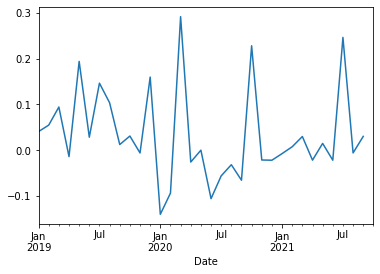

In [22]:
data['pct_change'].plot()

In [28]:
data['pct_change'].mask(data['pct_change'] < 0 , 0, inplace=True)
data['pct_change'].mask(data['pct_change'] > 0 , 1, inplace=True)

In [33]:
data = data.iloc[:-1]

In [44]:
X=data.iloc[:,:-1]

In [45]:
y=data.iloc[:,-1:]

In [59]:
y = np.ravel(y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [61]:
X_train

,Prior,Open,High,Low,Close,P/E,PEG,P/BV
Date,,,,,,,,
2020-04-01,29.66,29.46,39.80,29.27,38.31,84.58,1.38,10.76
2021-02-01,33.50,33.50,35.50,32.50,33.25,91.11,-7.37,6.09
2019-10-01,31.64,31.74,35.49,30.25,32.03,74.25,1.26,9.40
2020-10-01,30.50,30.75,32.00,27.50,28.50,96.70,-3.76,13.50
2019-09-01,28.67,28.47,32.33,28.47,31.64,73.33,1.24,9.28
2020-08-01,33.37,33.12,34.36,30.75,31.50,106.88,-4.16,14.93
2019-01-01,16.12,16.02,17.25,15.77,17.20,53.69,1.57,5.13
2019-11-01,32.03,32.13,35.10,31.84,33.02,78.56,2.52,9.43
2021-07-01,34.25,34.25,34.50,32.75,33.50,62.12,0.63,5.59


In [62]:
y_test

array([1., 0., 0., 1., 1., 0., 1.])

In [71]:
lm = LogisticRegression(solver ='liblinear')

scores = cross_val_score(lm,X_train,y_train,scoring='f1',cv=3)
scores

array([0.4       , 0.25      , 0.72727273])

In [53]:
data.corr()

,Prior,Open,High,Low,Close,P/E,PEG,P/BV,pct_change
Prior,1.000000,0.999049,0.934354,0.949461,0.890051,0.373980,0.368092,0.430404,-0.381266
Open,0.999049,1.000000,0.933087,0.944181,0.888474,0.376948,0.365799,0.430111,-0.376583
High,0.934354,0.933087,1.000000,0.926135,0.974677,0.418966,0.393743,0.422162,-0.475672
Low,0.949461,0.944181,0.926135,1.000000,0.928909,0.405389,0.316231,0.371016,-0.414752
Close,0.890051,0.888474,0.974677,0.928909,1.000000,0.374248,0.375566,0.348293,-0.452343
P/E,0.373980,0.376948,0.418966,0.405389,0.374248,1.000000,-0.056961,0.549360,-0.512211
PEG,0.368092,0.365799,0.393743,0.316231,0.375566,-0.056961,1.000000,0.460754,-0.127894
P/BV,0.430404,0.430111,0.422162,0.371016,0.348293,0.549360,0.460754,1.000000,-0.419397
pct_change,-0.381266,-0.376583,-0.475672,-0.414752,-0.452343,-0.512211,-0.127894,-0.419397,1.000000


In [67]:
model = LogisticRegression(solver ='liblinear')
reg = model.fit(X_train,y_train)

In [72]:
y_pred = reg.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         3
         1.0       0.50      0.50      0.50         4

    accuracy                           0.43         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.43      0.43      0.43         7



In [83]:
reg.coef_

array([[-0.04068541,  0.11626257, -0.29664124,  0.41191325, -0.14527344,
         0.02203132,  0.01683162, -0.27230235]])